EDA 




In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Import data

In [32]:
pd_data = pd.read_csv("consumption_temp.csv")


Explore the data

In [33]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49494 entries, 0 to 49493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         49494 non-null  object 
 1   location     49494 non-null  object 
 2   consumption  49494 non-null  float64
 3   temperature  49494 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [34]:
pd_data.head(-5)

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8
...,...,...,...,...
49484,2023-04-02 20:00:00,oslo,12.738356,-0.3
49485,2023-04-02 20:00:00,stavanger,5.875634,1.4
49486,2023-04-02 20:00:00,tromsø,2.076341,-2.7
49487,2023-04-02 20:00:00,trondheim,3.990767,-2.7


In [35]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49494 entries, 0 to 49493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         49494 non-null  object 
 1   location     49494 non-null  object 
 2   consumption  49494 non-null  float64
 3   temperature  49494 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


The dataset contains a total of 49,494 entries.
It has four columns:
Time: time (in UTC),format format 'YYYY-MM-DD HH:MM:SS', hourly values
Location: Biggest city in the price area, hence representative of the weather in that price area
Consumption: Average hourly consumption (in MW)
Temperature: Weather forecast for the location for that hour, available at the forecasting time (in degrees Celsius)


Quick insight before cleaning

In [36]:
import pandas as pd

# Assume df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment this line if reading data from a CSV file

# Calculate the overall average for temperature and consumption
average_values = df[['temperature', 'consumption']].mean()

print(average_values)


temperature    6.554019
consumption    3.509242
dtype: float64


First, we identify any missing values

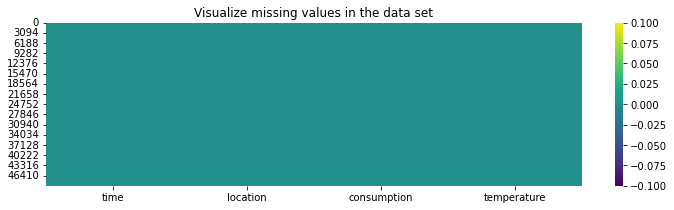

In [37]:
plt.figure(figsize=(12, 3))
sns.heatmap(pd_data.isnull(), cmap='viridis');
plt.title('Visualize missing values in the data set');

In [38]:
# Check for missing values
missing = pd_data.isnull().sum()

# If there are missing values, decide on a strategy (e.g., imputation, deletion)
# For now, we'll simply print the missing values count
print(missing)


time           0
location       0
consumption    0
temperature    0
dtype: int64


Lets identify if we have any zero values

In [39]:
zero_consumption_locations = pd_data[pd_data['consumption'] == 0]['location'].value_counts()
print(zero_consumption_locations)

helsingfors    32
Name: location, dtype: int64


In [40]:
pd_data[pd_data['location'] == "helsingfors"].head(35)

,time,location,consumption,temperature
11761,2022-07-14 21:00:00,helsingfors,0.000,15.800000
11767,2022-07-14 22:00:00,helsingfors,0.000,15.400000
11773,2022-07-14 23:00:00,helsingfors,0.000,15.500000
11779,2022-07-15 00:00:00,helsingfors,0.000,15.300000
11785,2022-07-15 01:00:00,helsingfors,0.000,14.800000
11791,2022-07-15 02:00:00,helsingfors,0.000,14.900000
11797,2022-07-15 03:00:00,helsingfors,0.000,14.300000
11803,2022-07-15 04:00:00,helsingfors,0.000,14.600000
11809,2022-07-15 05:00:00,helsingfors,0.000,14.300000
11815,2022-07-15 06:00:00,helsingfors,0.000,14.100000


We see that the first that the first 32 instances of consumption values from Helsingfors are 0.  

We need to examine wether there are any delayed measurments

In order to identify delayed measurements, it's essential to first understand the expected frequency of the data collection. In this case, the data is collected on an hourly basis. Any deviation from this hourly frequency could be considered as a delay. Below is a Python code snippet using the Pandas library to identify any delayed measurements in the dataset:

In [41]:
pd_data["time"] = pd.to_datetime(pd_data['time'])

In [42]:
import pandas as pd

# Load the dataset
data = pd_data

# Sort the data by 'Location' and 'Time'
data = data.sort_values(by=['location', 'time'])

# Calculate the time difference between consecutive measurements
data['time_diff'] = data.groupby('location')['time'].diff()

# Find delayed measurements (assuming a delay is when time_diff > 1 hour)
delayed_measurements = data[data['time_diff'] > pd.Timedelta(hours=1)]

# Print delayed measurements
print(delayed_measurements)


Empty DataFrame
Columns: [time, location, consumption, temperature, time_diff]
Index: []


Duplicates
Checking for duplicate rows and removing them if necessary.

In [43]:
# Check for duplicate rows
duplicate_rows = pd_data[pd_data.duplicated()]
print(f"Number of duplicate rows = {duplicate_rows.shape[0]}")

Number of duplicate rows = 0



There are no duplicates in the dataset

We need to check for outliers

In [44]:
pd_data.describe()

,consumption,temperature
count,49494.000000,49494.000000
mean,3.509242,6.554019
std,3.096356,7.630308
min,0.000000,-17.299999
25%,1.263256,1.000000
50%,2.376530,6.800000
75%,5.189000,12.100000
max,18.045011,30.500000


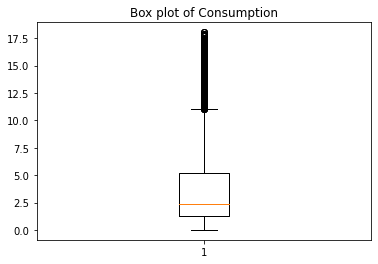

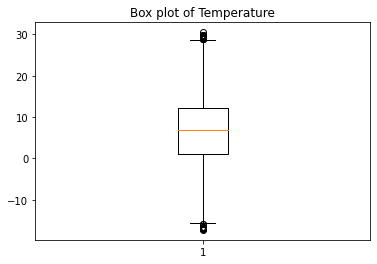

In [45]:
import matplotlib.pyplot as plt

# Box plot for consumption
plt.boxplot(pd_data['consumption'])
plt.title('Box plot of Consumption')
plt.show()

# Box plot for temperature
plt.boxplot(pd_data['temperature'])
plt.title('Box plot of Temperature')
plt.show()


In [46]:

bergen_data = pd_data[pd_data['location'] == 'bergen']
helsingfors_data = pd_data[pd_data['location'] == 'helsingfors']
oslo_data=pd_data[pd_data['location'] == 'oslo']
tromsø_data=pd_data[pd_data['location'] == 'tromsø']
trondheim_data=pd_data[pd_data['location'] == 'trondheim']
stavanger_data=pd_data[pd_data['location'] == 'stavanger']


In [47]:
def detect_outliers(data, column):
    # Calculate the IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Print summary information
    print(f"Number of outliers detected in {column}: {len(outliers)}")
    print(f"Mean value of outliers: {outliers[column].mean()}")
    print(f"Median value of outliers: {outliers[column].median()}")
    print(f"Minimum outlier value: {outliers[column].min()}")
    print(f"Maximum outlier value: {outliers[column].max()}")
    print(f"Sample outliers:\n{outliers[[column]].sample(5)}\n")  # Display a sample of 5 outliers
    
    return outliers

# Call the function
outliers_consumption = detect_outliers(pd_data, "consumption")


Number of outliers detected in consumption: 2434
Mean value of outliers: 13.149854649137232
Median value of outliers: 12.894122999999999
Minimum outlier value: 11.079138000000002
Maximum outlier value: 18.045011
Sample outliers:
       consumption
39170    13.823414
40196    14.589093
36698    14.914534
45494    11.193765
31760    11.731182



Consumption
There are 2,434 outliers in consumption, with values ranging from approximately 11.08 to 18.05 MW. The average outlier value is around 13.15 MW, close to the median of 12.89 MW. These outliers probably represent peak consumption hours. It's essential to find out if they indicate genuine high-consumption periods or are due to anomalies or recording errors.

Temperature
The sample outliers provided show temperatures nearing or exceeding 29°C. These temperatures are high, especially for cities like Bergen and Trondheim, but they are highly likely due to warm summer days, not data entry errors.

In [48]:
# List of all city data
city_datasets = {
    "bergen": bergen_data,
    "helsingfors": helsingfors_data,
    "oslo": oslo_data,
    "tromsø": tromsø_data,
    "trondheim": trondheim_data,
    "stavanger": stavanger_data
}

# Modify the detect_outliers function to return outliers without printing
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect and print outliers for each city and each column of interest
for city, data in city_datasets.items():
    print(f"Outliers for {city.upper()}:\n{'-'*30}")
    for column in ["consumption", "temperature"]:
        outliers = detect_outliers(data, column)
        print(f"Number of outliers detected in {column}: {len(outliers)}")
        if not outliers.empty:
            print(f"Mean value of outliers: {outliers[column].mean():.2f}")
            print(f"Median value of outliers: {outliers[column].median():.2f}")
            print(f"Minimum outlier value: {outliers[column].min():.2f}")
            print(f"Maximum outlier value: {outliers[column].max():.2f}")
            print(f"Sample outliers:\n{outliers[[column]].sample(5)}\n")
        else:
            print(f"No outliers detected for {column} in {city}.\n")
    print("\n")


Outliers for BERGEN:
------------------------------
Number of outliers detected in consumption: 0
No outliers detected for consumption in bergen.

Number of outliers detected in temperature: 39
Mean value of outliers: 11.07
Median value of outliers: 26.00
Minimum outlier value: -15.60
Maximum outlier value: 29.30
Sample outliers:
       temperature
9310     27.500000
33930   -10.700000
10145    26.700001
9330     29.299999
9335     29.100000



Outliers for HELSINGFORS:
------------------------------
Number of outliers detected in consumption: 1151
Mean value of outliers: 4.71
Median value of outliers: 5.16
Minimum outlier value: 0.00
Maximum outlier value: 7.86
Sample outliers:
       consumption
13939        5.029
17761        5.713
15493        5.116
13705        4.938
13459        4.884

Number of outliers detected in temperature: 0
No outliers detected for temperature in helsingfors.



Outliers for OSLO:
------------------------------
Number of outliers detected in consumption: 0

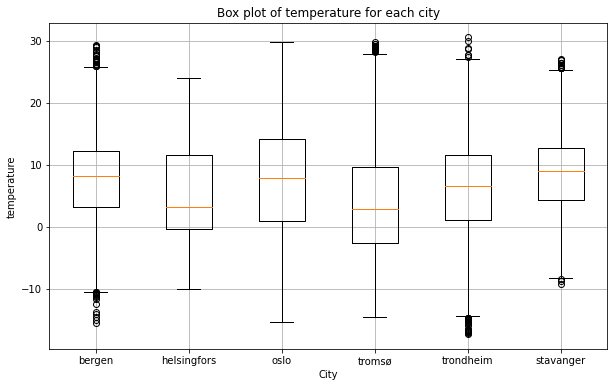

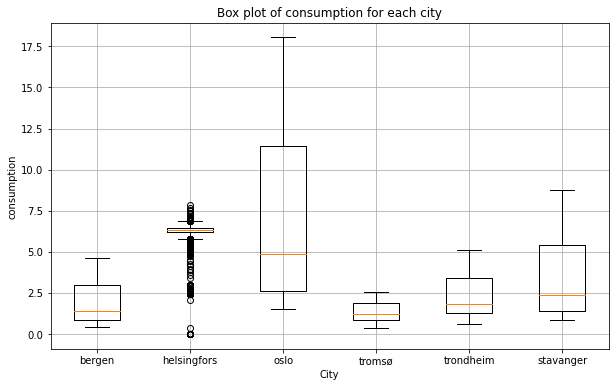

In [49]:


# Function to create box plots for a specified column
def create_box_plot(data_dict, column):
    # Collect data for each city into a list of Series
    data_list = [data[column] for data in data_dict.values()]
    city_names = list(data_dict.keys())
    
    # Create the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_list, labels=city_names, vert=True)
    plt.title(f'Box plot of {column} for each city')
    plt.ylabel(column)
    plt.xlabel('City')
    plt.grid(True)
    plt.show()

# Create box plots for temperature and consumption
create_box_plot(city_datasets, 'temperature')
create_box_plot(city_datasets, 'consumption')


BERGEN:
There were no outliers detected for consumption.
There were 39 outliers in temperature, ranging from -15.60°C to 29.30°C with a mean of 11.07°C.

HELSINGFORS:
1151 outliers were detected for consumption, with values ranging from 0.00 to 7.86 and an average of 4.71.
No outliers were found for temperature.

OSLO:
Both consumption and temperature data for Oslo did not contain any outliers.

TROMSØ:
No outliers were identified in the consumption data.
Temperature had 24 outliers with values between 28.10°C and 29.80°C, averaging at 28.85°C.

TRONDHEIM:
There were no outliers in the consumption data.
34 outliers were detected in temperature, with a span from -17.30°C to 30.50°C and a mean value of -6.67°C.

STAVANGER
No outliers detected for consumption in stavanger.
19 outliers detected in temperature, with a span from -9 to 27


In summary, while consumption had significant outliers only in Helsingfors, temperature outliers were more prevalent across cities, particularly in Bergen, Tromsø, Stavanger and Trondheim. Oslo was the only city without any outliers in either category.

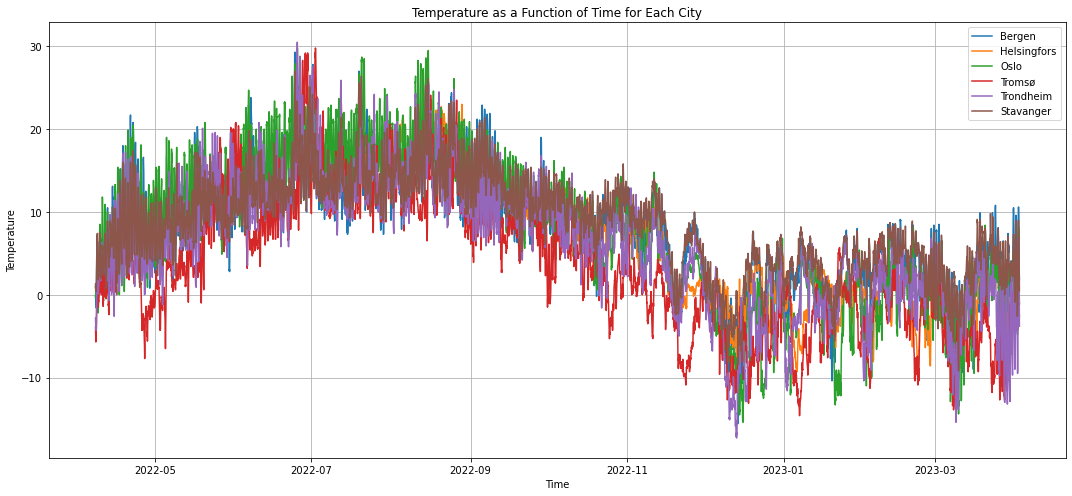

In [50]:
# List of cities
cities = ['bergen', 'helsingfors', 'oslo', 'tromsø', 'trondheim', "stavanger"]

plt.figure(figsize=(15, 7))

# Plotting temperature vs. time for each city
for city in cities:
    city_data = pd_data[pd_data['location'] == city]
    plt.plot(city_data['time'], city_data['temperature'], label=city.capitalize())

plt.title('Temperature as a Function of Time for Each City')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

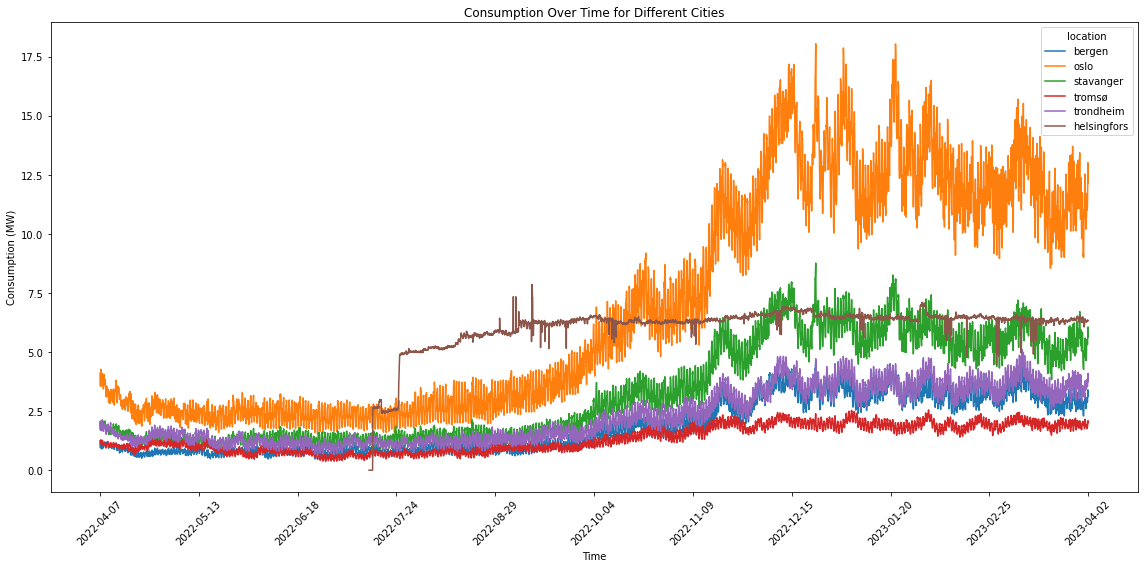

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size
plt.figure(figsize=(16, 8))

# Plotting consumption for each city over time
sns.lineplot(data=pd_data, x='time', y='consumption', hue='location')

# Setting plot title and labels
plt.title('Consumption Over Time for Different Cities')
plt.xlabel('Time')
plt.ylabel('Consumption (MW)')

# Limit the number of tick labels
unique_times = pd_data['time'].unique()
ticks_to_use = unique_times[::int(len(unique_times)/10)]  # This selects every nth label, where n is roughly 1/10th of the unique time values
plt.xticks(ticks_to_use, rotation=45)

plt.tight_layout()

# Displaying the plot
plt.show()


We can see that all locations exept helsingfors starts meausuring at 2022-04-07 21:00:00.
Helsingfors starts registering zero values at 2022-07-14 21:00:00, but only starts measuring non zero consumption values on 2022-07-16 05:00:00

In [53]:
bergen_data.head()


,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
5,2022-04-07 22:00:00,bergen,1.050327,0.0
10,2022-04-07 23:00:00,bergen,1.008794,-0.5
15,2022-04-08 00:00:00,bergen,0.984202,-1.1
20,2022-04-08 01:00:00,bergen,0.950335,-0.7


In [54]:
trondheim_data.head()

,time,location,consumption,temperature
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8
9,2022-04-07 22:00:00,trondheim,1.839443,-3.3
14,2022-04-07 23:00:00,trondheim,1.747675,-3.8
19,2022-04-08 00:00:00,trondheim,1.703176,-4.2
24,2022-04-08 01:00:00,trondheim,1.694300,-4.1


In [55]:
tromsø_data.head()

,time,location,consumption,temperature
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
8,2022-04-07 22:00:00,tromsø,1.180321,-4.3
13,2022-04-07 23:00:00,tromsø,1.138952,-5.1
18,2022-04-08 00:00:00,tromsø,1.140786,-5.7
23,2022-04-08 01:00:00,tromsø,1.140567,-3.9


In [56]:
oslo_data.head()

,time,location,consumption,temperature
1,2022-04-07 21:00:00,oslo,4.092830,1.0
6,2022-04-07 22:00:00,oslo,3.818095,0.4
11,2022-04-07 23:00:00,oslo,3.660981,0.3
16,2022-04-08 00:00:00,oslo,3.584066,0.2
21,2022-04-08 01:00:00,oslo,3.549536,0.4


In [57]:
helsingfors_data.head()

,time,location,consumption,temperature
11761,2022-07-14 21:00:00,helsingfors,0.0,15.8
11767,2022-07-14 22:00:00,helsingfors,0.0,15.4
11773,2022-07-14 23:00:00,helsingfors,0.0,15.5
11779,2022-07-15 00:00:00,helsingfors,0.0,15.3
11785,2022-07-15 01:00:00,helsingfors,0.0,14.8


In [58]:
stavanger_data.head()

,time,location,consumption,temperature
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
7,2022-04-07 22:00:00,stavanger,1.918996,0.8
12,2022-04-07 23:00:00,stavanger,1.821749,1.1
17,2022-04-08 00:00:00,stavanger,1.782011,1.1
22,2022-04-08 01:00:00,stavanger,1.744253,1.0


In [59]:
stavanger_data.head(-5)

,time,location,consumption,temperature
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
7,2022-04-07 22:00:00,stavanger,1.918996,0.8
12,2022-04-07 23:00:00,stavanger,1.821749,1.1
17,2022-04-08 00:00:00,stavanger,1.782011,1.1
22,2022-04-08 01:00:00,stavanger,1.744253,1.0
...,...,...,...,...
49437,2023-04-02 12:00:00,stavanger,5.444786,9.0
49443,2023-04-02 13:00:00,stavanger,5.392857,8.9
49449,2023-04-02 14:00:00,stavanger,5.332720,8.4
49455,2023-04-02 15:00:00,stavanger,5.318415,7.8


We can see that all locations exept helsingfors starts meausuring at 2022-04-07 21:00:00.
Helsingfors starts registering zero values at 2022-07-14 21:00:00, but only starts measuring non zero consumption values 
on 2022-07-16 05:00:00. However, Helsingfors are not mention in the task description
We see that all measurments ends 2023-04-02 16:00:00

Time formatting

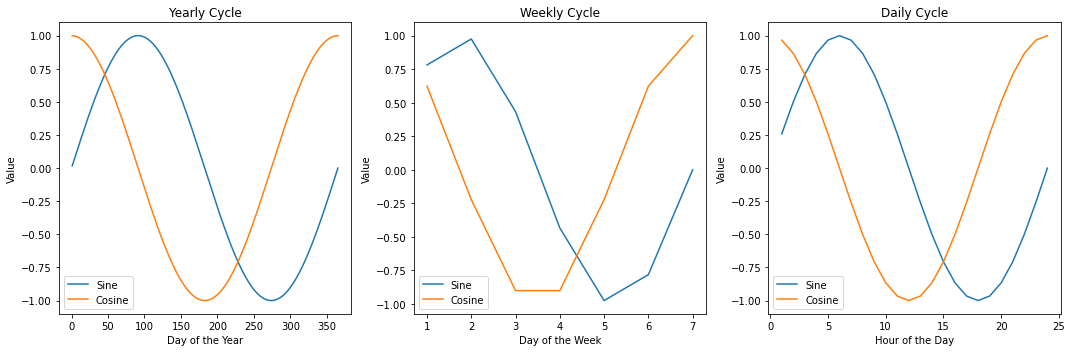

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for the cycles
days_in_year = 365
weeks_in_year = 52
days_in_week = 7

# Yearly cycle
year_day = np.arange(1, days_in_year + 1)
year_sin = np.sin(2 * np.pi * year_day / days_in_year)
year_cos = np.cos(2 * np.pi * year_day / days_in_year)

# Weekly cycle
week_day = np.arange(1, days_in_week + 1)
week_sin = np.sin(2 * np.pi * week_day / days_in_week)
week_cos = np.cos(2 * np.pi * week_day / days_in_week)

# Daily cycle (24 hours)
hour_day = np.arange(1, 25)
day_sin = np.sin(2 * np.pi * hour_day / 24)
day_cos = np.cos(2 * np.pi * hour_day / 24)

# Plotting
plt.figure(figsize=(15, 5))

# Yearly cycle plot
plt.subplot(1, 3, 1)
plt.plot(year_day, year_sin, label='Sine')
plt.plot(year_day, year_cos, label='Cosine')
plt.title('Yearly Cycle')
plt.xlabel('Day of the Year')
plt.ylabel('Value')
plt.legend()

# Weekly cycle plot
plt.subplot(1, 3, 2)
plt.plot(week_day, week_sin, label='Sine')
plt.plot(week_day, week_cos, label='Cosine')
plt.title('Weekly Cycle')
plt.xlabel('Day of the Week')
plt.ylabel('Value')
plt.legend()

# Daily cycle plot
plt.subplot(1, 3, 3)
plt.plot(hour_day, day_sin, label='Sine')
plt.plot(hour_day, day_cos, label='Cosine')
plt.title('Daily Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


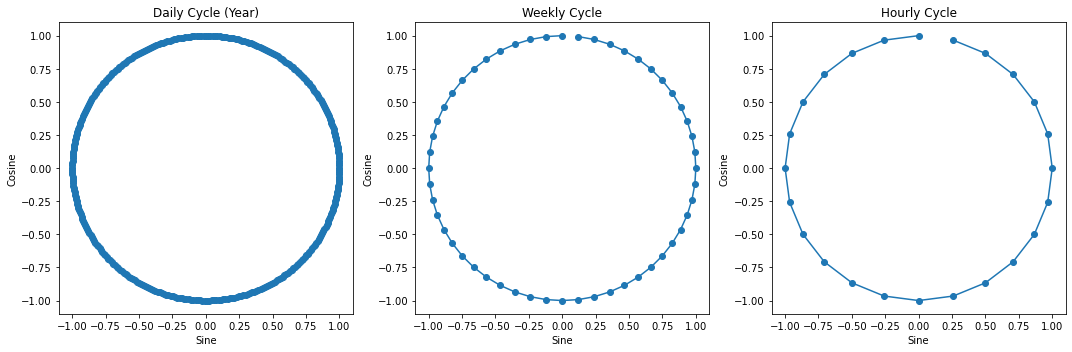

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Number of units (days, weeks, hours)
days = np.arange(1, 366)  # Day of the year
weeks = np.arange(1, 53)  # Week of the year
hours = np.arange(1, 25)  # Hour of the day

# Calculate radians
days_radians = (2 * np.pi * days) / 365
weeks_radians = (2 * np.pi * weeks) / 52
hours_radians = (2 * np.pi * hours) / 24

# Calculate sine and cosine for each cycle
day_sin = np.sin(days_radians)
day_cos = np.cos(days_radians)

week_sin = np.sin(weeks_radians)
week_cos = np.cos(weeks_radians)

hour_sin = np.sin(hours_radians)
hour_cos = np.cos(hours_radians)

# Plotting
plt.figure(figsize=(15, 5))

# Daily Cycle
plt.subplot(1, 3, 1)
plt.plot(day_sin, day_cos, 'o-')
plt.title('Daily Cycle (Year)')
plt.xlabel('Sine')
plt.ylabel('Cosine')

# Weekly Cycle
plt.subplot(1, 3, 2)
plt.plot(week_sin, week_cos, 'o-')
plt.title('Weekly Cycle')
plt.xlabel('Sine')
plt.ylabel('Cosine')

# Hourly Cycle
plt.subplot(1, 3, 3)
plt.plot(hour_sin, hour_cos, 'o-')
plt.title('Hourly Cycle')
plt.xlabel('Sine')
plt.ylabel('Cosine')

plt.tight_layout()
plt.show()


Scatter plots that display the cyclic nature of the time variables, where each point on the plot corresponds to a unique value of the time variable.

In [62]:
import pandas as pd

# Make sure 'time' is in datetime format if it's not already
pd_data['time'] = pd.to_datetime(pd_data['time'])

# Get the unique days and count them
total_days = pd_data['time'].dt.date.nunique()

print(f"The total number of unique days in the dataset is: {total_days}")


The total number of unique days in the dataset is: 361


In [63]:
# First a general adaption of the time column

pd_data["time"] = pd.to_datetime(pd_data['time'])

In [64]:
# Convert location to a categorical variable
pd_data['location'] = pd_data['location'].astype('category')

Correlation analysis

In [65]:
locations = pd_data["location"].unique()
print(locations)
pd_data.head()

['bergen', 'oslo', 'stavanger', 'tromsø', 'trondheim', 'helsingfors']
Categories (6, object): ['bergen', 'helsingfors', 'oslo', 'stavanger', 'tromsø', 'trondheim']


,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


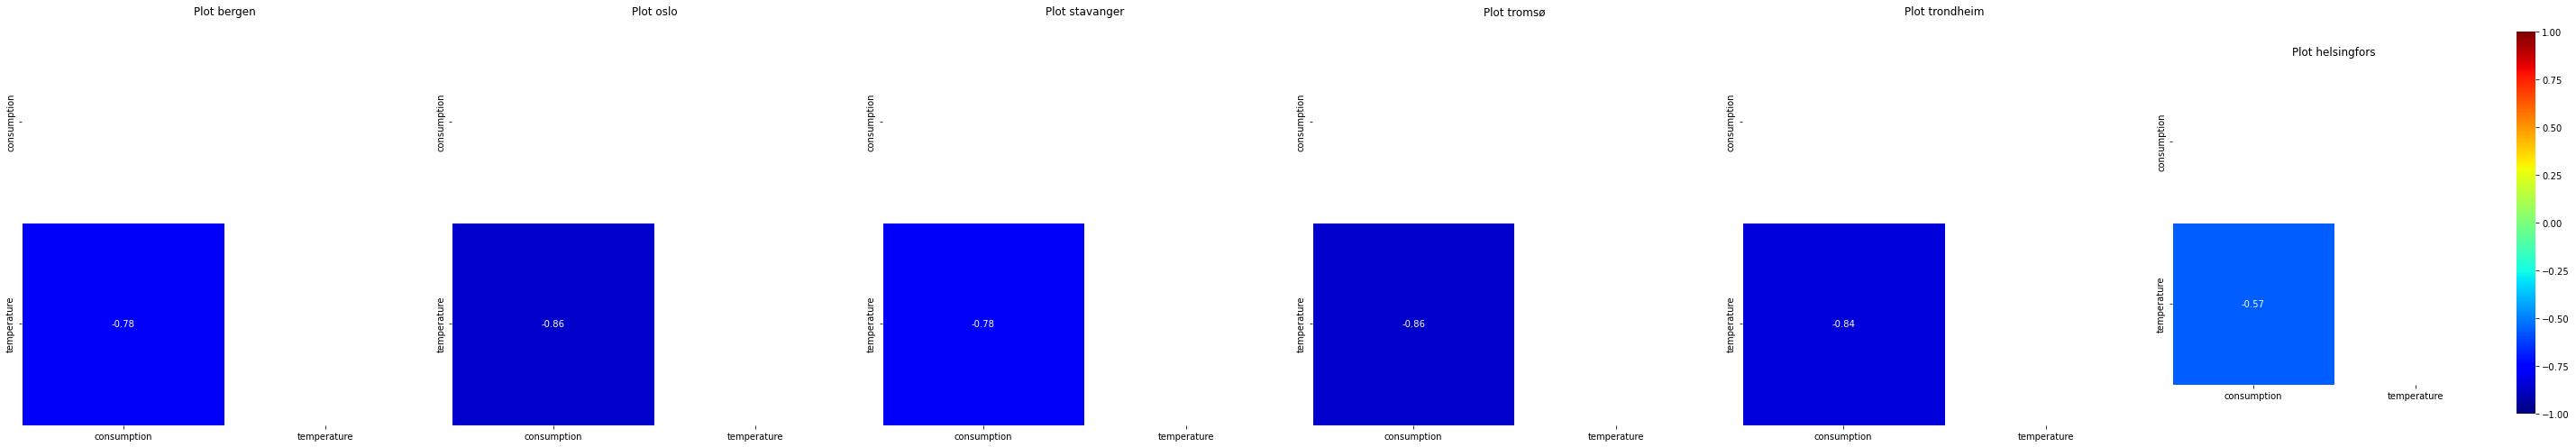

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(40, 15))
correlations = []

for loc in locations:
     # Filter the DataFrame based on location
    pd_loc = pd_data[pd_data['location'] == loc].drop(columns = ["location"])
    
    # Ensure that the datetime columns, or non-numeric columns are handled or removed before calculating correlation
    #numeric_cols = pd_loc.select_dtypes(include=[np.number])
    pd_loc_corr = pd_loc.corr()
    correlations.append(pd_loc_corr)

    # Create a mask for the upper triangle
    
    # Set up the matplotlib figure
    #f, ax = plt.subplots(figsize=(10, 7))
    
    # Draw the heatmap with the mask and correct aspect ratio
    #heatmap = sns.heatmap(pd_loc_corr, ax=ax, cmap='jet', cbar_kws={"shrink": .8}, mask=mask, vmax=.3, center=0, annot=True,
     #                     fmt='.2f',square=True, linewidths=.5)

    # Add a title
    #plt.title(f'Correlation analysis for {loc}', fontsize=20)
    
    
for i, ax in enumerate(axes):
    mask = np.triu(np.ones_like(correlations[i], dtype=bool))
    cbar = ax == axes.flat[-1]
    sns.heatmap(correlations[i], ax=ax, mask=mask, cmap='jet', vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
                square=True, linewidths=.5, cbar = cbar, cbar_kws={"shrink": .4})
    ax.set_title(f'Plot {locations[i]}')
    

    
    # Show the plot
    #plt.show()
plt.tight_layout()  # Adjusts plots so they don't overlap
plt.show()

Key takeaway:
Temperature and consumption is highly correlated in trondheim, bergen, oslo, tromsø and stavanger (ish 0.86), but less in helsingfors (0.58).



As you might see from the dataset, the consumption has seasonality. For example, you will have higher values of consumption during the day and lower during the night. On average, you will see lower consumption on weekends. You will see seasonality in seasons, months, etc. as well. So, it makes sense to use some kind of calendar feature that denote what hour, week day, month, or season it is.
It will also benefit to use the historical lagged values for consumption, i.e. using the values from a week ago. Beware that you can also use data available to you during forecasts, i.e. you cannot use data from a day ago, since it won't be available at the time of predictions.

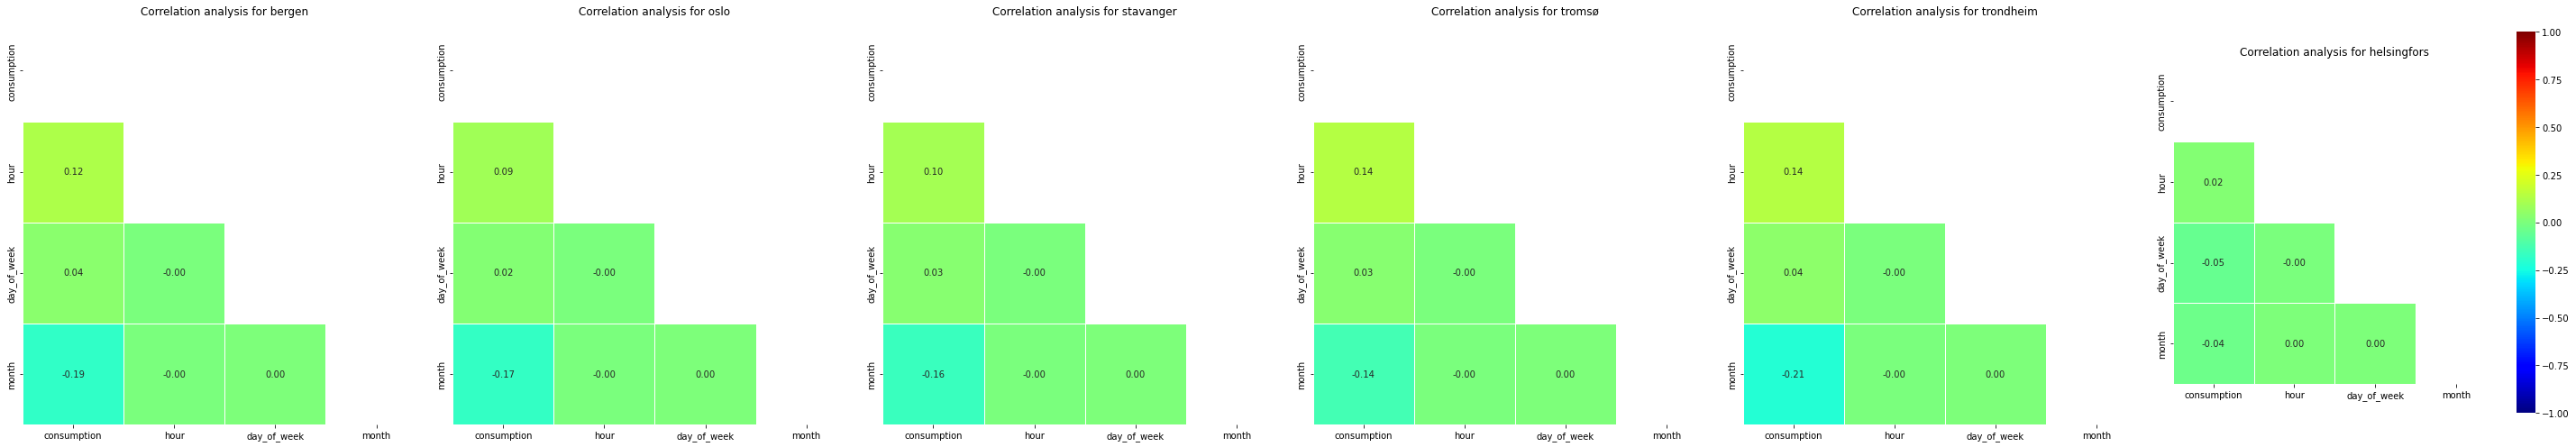

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming pd_data is your DataFrame
# Convert the 'time' column to datetime format if it's not already
pd_data['time'] = pd.to_datetime(pd_data['time'])

# Extract features from the 'time' column
pd_data['hour'] = pd_data['time'].dt.hour
pd_data['day_of_week'] = pd_data['time'].dt.dayofweek
pd_data['month'] = pd_data['time'].dt.month

# Now create a new DataFrame to hold the correlations
correlations = []

# Loop through each location
for loc in pd_data['location'].unique():
    # Filter the DataFrame based on location
    pd_loc = pd_data[pd_data['location'] == loc]
    
    # Calculate the correlation matrix
    pd_loc_corr = pd_loc[['consumption', 'hour', 'day_of_week', 'month']].corr()
    correlations.append(pd_loc_corr)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(correlations), figsize=(40, 15))

# Loop through each location and plot the correlation matrix
for i, ax in enumerate(axes):
    mask = np.triu(np.ones_like(correlations[i], dtype=bool))
    cbar = ax == axes.flat[-1]
    sns.heatmap(correlations[i], ax=ax, mask=mask, cmap='jet', vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
                square=True, linewidths=.5, cbar=cbar, cbar_kws={"shrink": .4})
    ax.set_title(f'Correlation analysis for {pd_data["location"].unique()[i]}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


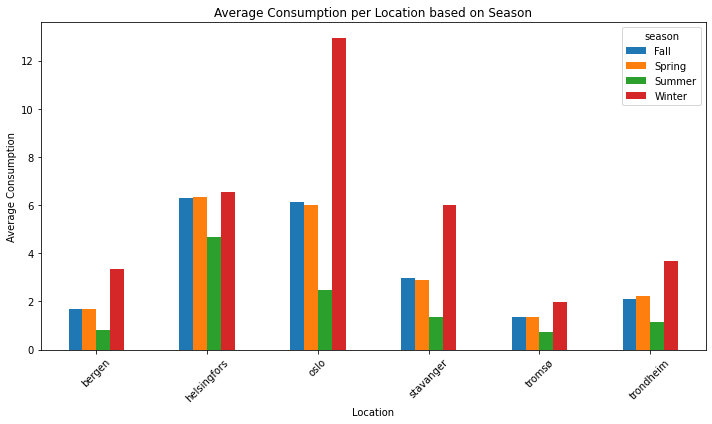

In [68]:
# The following feature ("season_int") is only used for plotting
# Define a function to categorize into 'Summer' and 'Winter' etc. 
def get_season(date):
    if 6 <= date.month <= 8:  # Defining summer from June to August
        return 'Summer'
    elif 12 == date.month or date.month <= 2:  # Defining winter from December to February
        return 'Winter'
    elif 3 <= date.month <= 5:
        return 'Spring'
    elif 9 <= date.month <= 11:
        return 'Fall'
    else:
        return "ERROR"

# Apply the function to create a new 'season' column
pd_data['season'] = pd_data['time'].apply(get_season)

# Group by 'location' and 'season', then calculate the mean for 'consumption'
avg_consumption = pd_data.groupby(['location', 'season'])['consumption'].mean().reset_index()

# Pivot the data for better visualization
pivot_avg_consumption = avg_consumption.pivot(index='location', columns='season', values='consumption')

# Plot
plt.figure(figsize=(10, 6))
pivot_avg_consumption.plot(kind='bar', ax=plt.gca())
plt.xlabel('Location')
plt.ylabel('Average Consumption')
plt.title('Average Consumption per Location based on Season')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

No question if there is seasonality involved! We can regonize this in the descriptive model by making sinus and cosinus functions that follow the seasonality. Then we can find the correlation to consumption to find the best features.

In [69]:
from datetime import datetime

# Add periodic features to help with seasonality
timestamp_s = pd_data["time"].map(datetime.timestamp)
day = 24 * 60 * 60
year = (365.2425) * day
week = 7 * day
pd_data['day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
pd_data['day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
pd_data['week_sin'] = np.sin(timestamp_s * (2 * np.pi / week))
pd_data['week_cos'] = np.cos(timestamp_s * (2 * np.pi / week))
pd_data['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
pd_data['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

pd_data.to_csv("preprocessed_data.csv", index=False)

pd_data.head(30)


,time,location,consumption,temperature,hour,day_of_week,month,season,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,21,3,4,Spring,-9.659258e-01,0.258819,0.652287,0.757972,0.994904,-0.100827
1,2022-04-07 21:00:00,oslo,4.092830,1.0,21,3,4,Spring,-9.659258e-01,0.258819,0.652287,0.757972,0.994904,-0.100827
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,21,3,4,Spring,-9.659258e-01,0.258819,0.652287,0.757972,0.994904,-0.100827
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,21,3,4,Spring,-9.659258e-01,0.258819,0.652287,0.757972,0.994904,-0.100827
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,21,3,4,Spring,-9.659258e-01,0.258819,0.652287,0.757972,0.994904,-0.100827
5,2022-04-07 22:00:00,bergen,1.050327,0.0,22,3,4,Spring,-8.660254e-01,0.500000,0.680173,0.733052,0.994831,-0.101540
6,2022-04-07 22:00:00,oslo,3.818095,0.4,22,3,4,Spring,-8.660254e-01,0.500000,0.680173,0.733052,0.994831,-0.101540
7,2022-04-07 22:00:00,stavanger,1.918996,0.8,22,3,4,Spring,-8.660254e-01,0.500000,0.680173,0.733052,0.994831,-0.101540
8,2022-04-07 22:00:00,tromsø,1.180321,-4.3,22,3,4,Spring,-8.660254e-01,0.500000,0.680173,0.733052,0.994831,-0.101540
9,2022-04-07 22:00:00,trondheim,1.839443,-3.3,22,3,4,Spring,-8.660254e-01,0.500000,0.680173,0.733052,0.994831,-0.101540


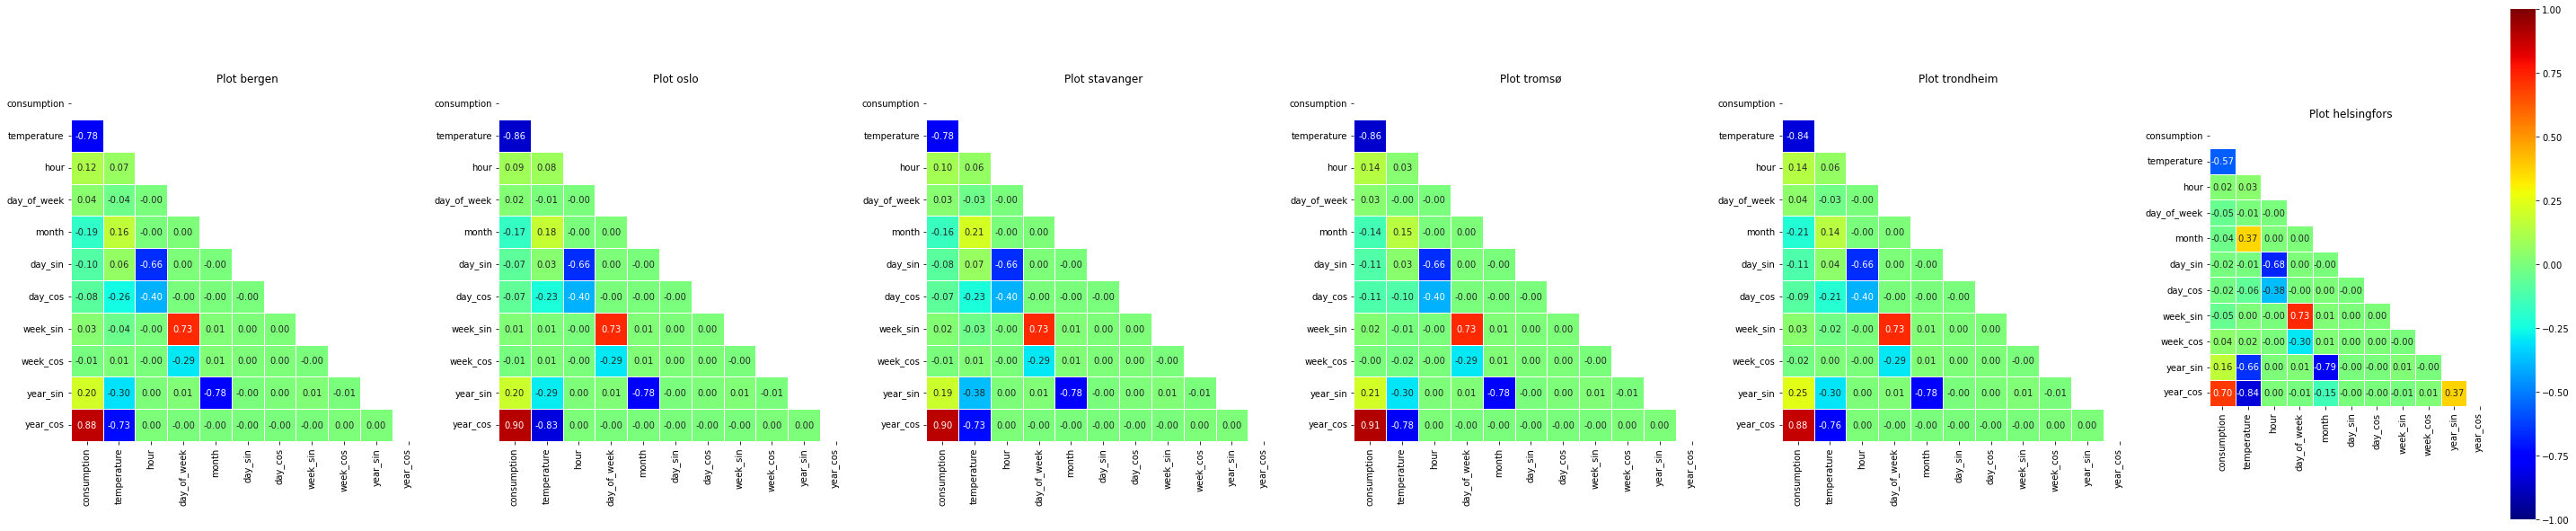

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(40, 20))
correlations2 = []
locations2 = pd_data["location"].unique()

for loc in locations2:
     # Filter the DataFrame based on location
    pd_loc2 = pd_data[pd_data['location'] == loc].drop(columns = ["location", "season"])
    
    # Ensure that the datetime columns, or non-numeric columns are handled or removed before calculating correlation
    #numeric_cols = pd_loc.select_dtypes(include=[np.number])
    pd_loc_corr2 = pd_loc2.corr()
    correlations2.append(pd_loc_corr2)

    # Create a mask for the upper triangle
    
    # Set up the matplotlib figure
    #f, ax = plt.subplots(figsize=(10, 7))
    
    # Draw the heatmap with the mask and correct aspect ratio
    #heatmap = sns.heatmap(pd_loc_corr, ax=ax, cmap='jet', cbar_kws={"shrink": .8}, mask=mask, vmax=.3, center=0, annot=True,
     #                     fmt='.2f',square=True, linewidths=.5)

    # Add a title
    #plt.title(f'Correlation analysis for {loc}', fontsize=20)
    
    
for i, ax in enumerate(axes):
    mask = np.triu(np.ones_like(correlations2[i], dtype=bool))
    cbar = ax == axes.flat[-1]
    sns.heatmap(correlations2[i], ax=ax, mask=mask, cmap='jet', vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
                square=True, linewidths=.5, cbar = cbar, cbar_kws={"shrink": .4})
    ax.set_title(f'Plot {locations2[i]}')
    

    
    # Show the plot
    #plt.show()
plt.tight_layout()  # Adjusts plots so they don't overlap
plt.show()

Key takeaways:
1. The year_cos is a great feature
2. There is no intraday seasonality caught by the features. This is strange, as there should be more at day than night etc. TODO investigate further, could be something wrong with the feature generation

Other EDA:

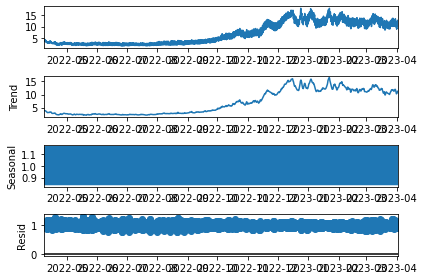

In [72]:
# Inspiration: https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861
pd_data_copy = pd_data[pd_data["location"] == "oslo"].set_index("time")
analysis = pd_data_copy[['consumption']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid



decompose_result_mult.plot();


In [73]:
# Define a mapping from season to integer
season_mapping = {
    'Winter': 1,
    'Spring': 2,
    'Summer': 3,
    'Fall': 4
}

# Create a new column with integer representations
pd_data['season_int'] = pd_data['season'].replace(season_mapping)
pd_data.head()

,time,location,consumption,temperature,hour,day_of_week,month,season,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,season_int
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2
1,2022-04-07 21:00:00,oslo,4.092830,1.0,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2


In [74]:
print(pd_data.dtypes)

time           datetime64[ns]
location             category
consumption           float64
temperature           float64
hour                    int64
day_of_week             int64
month                   int64
season                 object
day_sin               float64
day_cos               float64
week_sin              float64
week_cos              float64
year_sin              float64
year_cos              float64
season_int              int64
dtype: object


Not much use for the seasonality. What about for each indivudual month?

In [78]:
# Splitting into location

pd_trondheim = pd_data[pd_data["location"] == "trondheim"].drop(columns = ["location"])
pd_bergen = pd_data[pd_data["location"] == "bergen"].drop(columns = ["location"])
pd_oslo = pd_data[pd_data["location"] == "oslo"].drop(columns = ["location"])
pd_tromsø = pd_data[pd_data["location"] == "tromsø"].drop(columns = ["location"])
pd_stavanger = pd_data[pd_data["location"] == "stavanger"].drop(columns = ["location"])
pd_helsingfors = pd_data[pd_data["location"] == "helsingfors"].drop(columns = ["location"])

pd_trondheim.head()


,time,consumption,temperature,hour,day_of_week,month,season,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,season_int
4,2022-04-07 21:00:00,1.970098,-2.8,21,3,4,Spring,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,2
9,2022-04-07 22:00:00,1.839443,-3.3,22,3,4,Spring,-0.866025,0.500000,0.680173,0.733052,0.994831,-0.101540,2
14,2022-04-07 23:00:00,1.747675,-3.8,23,3,4,Spring,-0.707107,0.707107,0.707107,0.707107,0.994758,-0.102253,2
19,2022-04-08 00:00:00,1.703176,-4.2,0,4,4,Spring,-0.500000,0.866025,0.733052,0.680173,0.994685,-0.102966,2
24,2022-04-08 01:00:00,1.694300,-4.1,1,4,4,Spring,-0.258819,0.965926,0.757972,0.652287,0.994611,-0.103679,2


Conclusion: it makes sense to use some kind of calendar feature that denote what hour, week day, month, or season it is.
It will also benefit to use the historical lagged values for consumption, i.e. using the values from a week ago. Beware that we can only use data available during forecasts, i.e. you cannot use data from a day ago, since it won't be available at the time of predictions.

------------------------------------------------------------------------------------------------------------